In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

train_csv = pd.read_csv("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/FracAtlas/Utilities/Fracture Split/train.csv")
test_csv = pd.read_csv("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/FracAtlas/Utilities/Fracture Split/test.csv")
valid_csv = pd.read_csv("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/FracAtlas/Utilities/Fracture Split/valid.csv")

In [ ]:
train_csv

,image_id
0,IMG0000019.jpg
1,IMG0000025.jpg
2,IMG0000044.jpg
3,IMG0000057.jpg
4,IMG0000058.jpg
...,...
569,IMG0003267.jpg
570,IMG0003279.jpg
571,IMG0003280.jpg
572,IMG0003293.jpg


In [ ]:
test_csv

,image_id
0,IMG0003297.jpg
1,IMG0003298.jpg
2,IMG0003301.jpg
3,IMG0003308.jpg
4,IMG0003309.jpg
...,...
56,IMG0003686.jpg
57,IMG0003703.jpg
58,IMG0003704.jpg
59,IMG0003712.jpg


In [ ]:
valid_csv

,image_id
0,IMG0003733.jpg
1,IMG0003734.jpg
2,IMG0003766.jpg
3,IMG0003767.jpg
4,IMG0003770.jpg
...,...
77,IMG0004369.jpg
78,IMG0004370.jpg
79,IMG0004374.jpg
80,IMG0004375.jpg


In [ ]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#!pip3 show keras

In [ ]:
# Check Tensorflow and Keras version from your system.

print('TensorFlow version is '+tf.__version__)

TensorFlow version is 2.15.0


**Creating** **Training** **Dataset**

In [ ]:
# Check and display the number of images in train-dataset.
train_image_data_dir = "/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/train-img/train-img/train"
train_image_data_dir = pathlib.Path(train_image_data_dir)
train_image_count = len(list(train_image_data_dir.glob('*/*.jpg')))
train_image_count_fractured = len(list(train_image_data_dir.glob('Fractured/*')))
train_image_count_non_fractured = len(list(train_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(train_image_count))
print("fractured = "+str(train_image_count_fractured))
print("non-fractured = "+str(train_image_count_non_fractured))

Total = 3267
fractured = 574
non-fractured = 2693


In [ ]:
from struct import unpack
from tqdm import tqdm
import os


marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

for img in tqdm(list(train_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/train-img/train-img/train",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/train-img/train-img/train",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(train_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/train-img/train-img/train",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/train-img/train-img/train",name))
    print(name)

100%|██████████| 574/574 [00:07<00:00, 76.04it/s] 


**Creating** **validation** **Dataset**

In [ ]:
# Check and display the number of images in valid-dataset.
valid_image_data_dir = "/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/valid-img/valid-img/valid"
valid_image_data_dir = pathlib.Path(valid_image_data_dir)
valid_image_count = len(list(valid_image_data_dir.glob('*/*.jpg')))
valid_image_count_fractured = len(list(valid_image_data_dir.glob('Fractured/*')))
Valid_image_count_non_fractured = len(list(valid_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(valid_image_count))
print("fractured = "+str(valid_image_count_fractured))
print("non-fractured = "+str(Valid_image_count_non_fractured))

Total = 469
fractured = 82
non-fractured = 387


In [ ]:
from struct import unpack
from tqdm import tqdm
import os


marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

for img in tqdm(list(valid_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/valid-img/valid-img/valid",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/valid-img/valid-img/valid",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(valid_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/valid-img/valid-img/valid",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/valid-img/valid-img/valid",name))
    print(name)

100%|██████████| 82/82 [00:40<00:00,  2.01it/s]


**Creating** **Testing** **Dataset**

In [ ]:
# Check and display the number of images in test-dataset.
test_image_data_dir = "/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/test-img/test-img/test"
test_image_data_dir = pathlib.Path(test_image_data_dir)
test_image_count = len(list(test_image_data_dir.glob('*/*.jpg')))
test_image_count_fractured = len(list(test_image_data_dir.glob('Fractured/*')))
test_image_count_non_fractured = len(list(test_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(test_image_count))
print("fractured = "+str(test_image_count_fractured))
print("non-fractured = "+str(test_image_count_non_fractured))

Total = 347
fractured = 61
non-fractured = 286


In [ ]:
from struct import unpack
from tqdm import tqdm
import os


marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

for img in tqdm(list(test_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/test-img/test-img/test",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/test-img/test-img/test",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(test_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/test-img/test-img/test",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/Thesis/FracAtlas-20231212T172600Z-001/FracAtlas/test-img/test-img/test",name))
    print(name)

100%|██████████| 61/61 [00:21<00:00,  2.86it/s]


**Defining** **Image** **Size**

In [ ]:
# Define the basic parameter, e.g., Batch Size, Image Size.
batch_size = 32 #refers to the number of training examples utilize in one iteration
img_height = 224
img_width = 224

**Training** **Dataset**

In [ ]:
# Define to use 100% of the images for training.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_image_data_dir,
  #validation_split=0.2,
  #subset="training",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 3267 files belonging to 2 classes.


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [ ]:
# Display the name of classes.
class_names = train_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


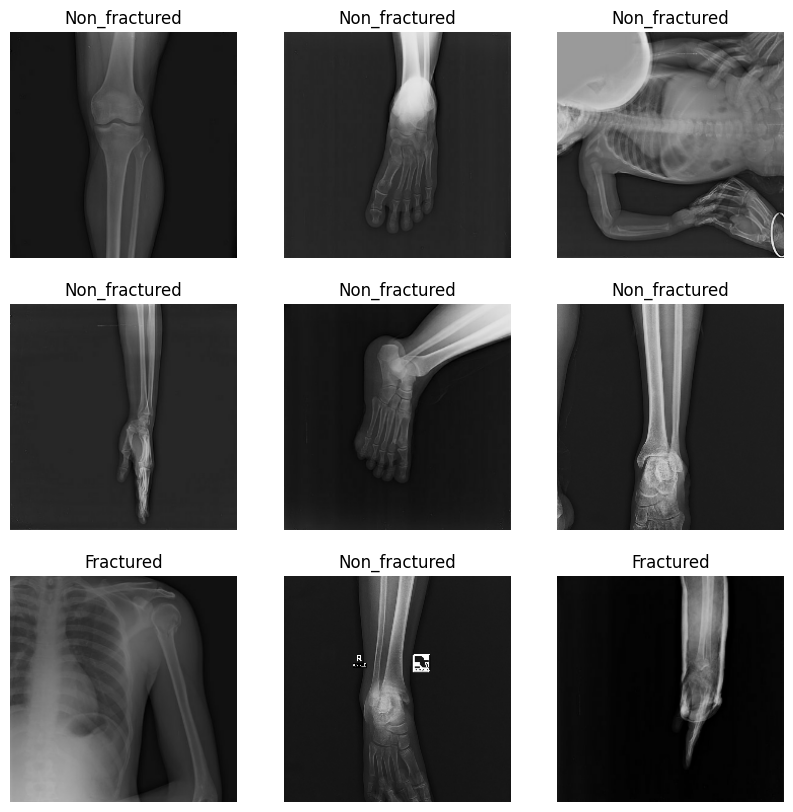

In [ ]:
# Display some sample images from the training images dataset.
plt.figure(figsize=(10, 10))
if not train_ds:
  print("The train_ds dataset is empty.")
else:
  for images, labels in train_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[np.argmax(labels[i])]) #argmax takes max value from the 2 columns and shows the label
      plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 224, 224, 3)
(30, 2)


**Validation** **Dataset**

In [ ]:
# Define to use 100% of the images for validation.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_image_data_dir,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 469 files belonging to 2 classes.


In [ ]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [ ]:
# Display the name of classes.
class_names = val_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


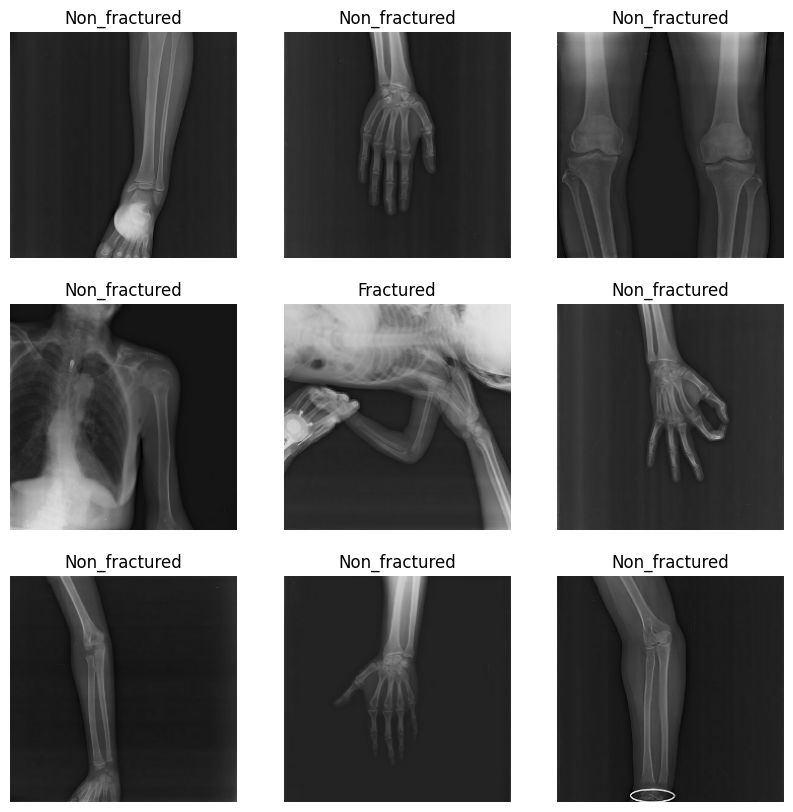

In [ ]:
# Display some sample images from the validation images dataset.
plt.figure(figsize=(10, 10))
if not val_ds:
  print("The val_ds dataset is empty.")
else:
  for images, labels in val_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[np.argmax(labels[i])]) #argmax takes max value from the 2 columns and shows the label
      plt.axis("off")

In [ ]:
for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 224, 224, 3)
(30, 2)


**Testing** **Dataset**

In [ ]:
# Define to use 100% of the images for validation.
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_image_data_dir,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 347 files belonging to 2 classes.


In [ ]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [ ]:
# Display the name of classes.
class_names = test_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


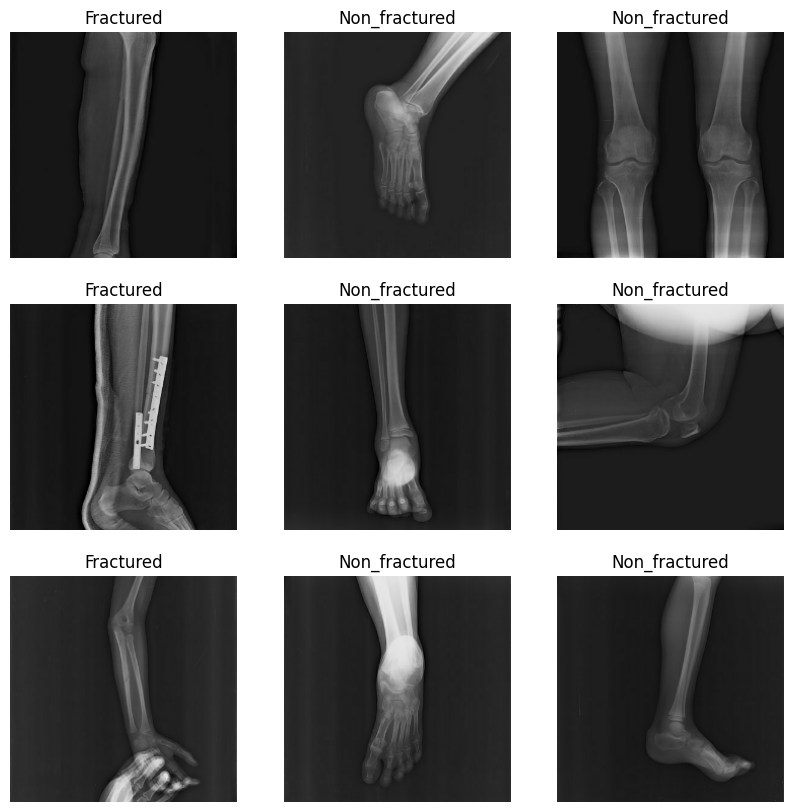

In [ ]:
# Display some sample images from the test_ds images dataset.
plt.figure(figsize=(10, 10))
if not test_ds:
  print("The test_ds dataset is empty.")
else:
  for images, labels in test_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[np.argmax(labels[i])]) #argmax takes max value from the 2 columns and shows the label
      plt.axis("off")

In [ ]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 224, 224, 3)
(30, 2)


**Configure** **the** **dataset** **for** **performance**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Importing** **Functions** **To** **Implement** **Model**

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os

import numpy as np

from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import keras_export

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation
from tensorflow.keras.layers import BatchNormalization, concatenate
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import get_file

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.5 MB/s eta 0:00:00


**Implementing** **Model**

In [ ]:
precision_m = tf.keras.metrics.Precision()

In [ ]:
import numpy as np
import tensorflow as tf
from keras import backend as K


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras


def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())


def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

In [ ]:
#model for weight=imagenet

from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Create EfficientNetV2B2 base model
base_model = EfficientNetB1  (weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1000, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

#declaring learning rate and its changes
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.90,
    staircase=True)

# Compile the model (you can adjust the optimizer and loss function)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy', precision, recall, f1])

# Display the model summary
model.summary()

27018416/27018416 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     

In [ ]:
# Start model training with Dropout using validation set
epochs = 3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
109/109 [==============================] - 119s 408ms/step - loss: 0.3926 - accuracy: 0.8454 - precision: 0.8455 - recall: 0.8455 - f1: 0.8455 - val_loss: 0.5862 - val_accuracy: 0.8507 - val_precision: 0.8530 - val_recall: 0.8530 - val_f1: 0.8530
Epoch 2/3
109/109 [==============================] - 37s 341ms/step - loss: 0.2644 - accuracy: 0.9030 - precision: 0.9031 - recall: 0.9031 - f1: 0.9031 - val_loss: 0.3426 - val_accuracy: 0.8742 - val_precision: 0.8759 - val_recall: 0.8759 - val_f1: 0.8759
Epoch 3/3
109/109 [==============================] - 37s 344ms/step - loss: 0.1855 - accuracy: 0.9284 - precision: 0.9284 - recall: 0.9284 - f1: 0.9284 - val_loss: 0.4492 - val_accuracy: 0.9062 - val_precision: 0.9071 - val_recall: 0.9071 - val_f1: 0.9071


In [ ]:
# Start model training with Dropout using validation set
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
109/109 [==============================] - 39s 357ms/step - loss: 0.1118 - accuracy: 0.9627 - precision: 0.9627 - recall: 0.9627 - f1: 0.9627 - val_loss: 0.3681 - val_accuracy: 0.8998 - val_precision: 0.9021 - val_recall: 0.9021 - val_f1: 0.9021
Epoch 2/100
109/109 [==============================] - 38s 351ms/step - loss: 0.1053 - accuracy: 0.9657 - precision: 0.9657 - recall: 0.9657 - f1: 0.9657 - val_loss: 0.3917 - val_accuracy: 0.8571 - val_precision: 0.8580 - val_recall: 0.8580 - val_f1: 0.8580
Epoch 3/100
109/109 [==============================] - 39s 355ms/step - loss: 0.0525 - accuracy: 0.9813 - precision: 0.9813 - recall: 0.9813 - f1: 0.9813 - val_loss: 0.3747 - val_accuracy: 0.9041 - val_precision: 0.9062 - val_recall: 0.9062 - val_f1: 0.9062
Epoch 4/100
109/109 [==============================] - 39s 355ms/step - loss: 0.0573 - accuracy: 0.9822 - precision: 0.9823 - recall: 0.9823 - f1: 0.9823 - val_loss: 0.5865 - val_accuracy: 0.9168 - val_precision: 0.9187 - val_

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'f1', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_f1'])

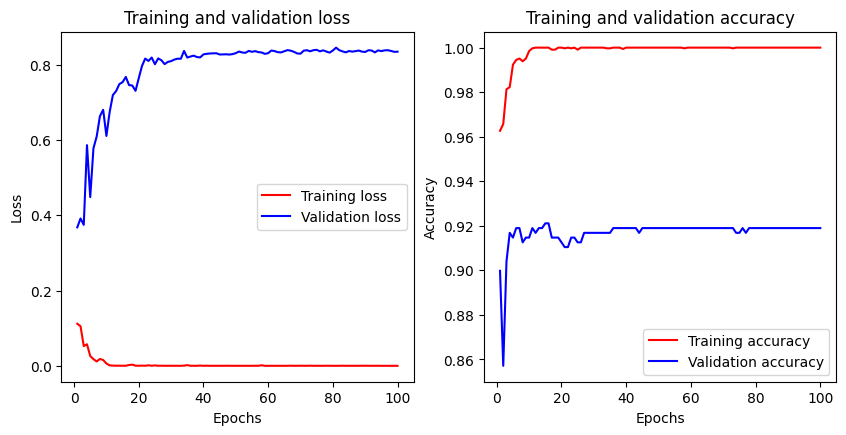

In [ ]:
import matplotlib.pyplot as plt
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,loss,'r',label='Training loss')
ax1.plot(epochs,val_loss,'b',label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2=plt.subplot(222)
ax2.plot(epochs,acc,'r',label='Training accuracy')
ax2.plot(epochs,val_acc,'b',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()


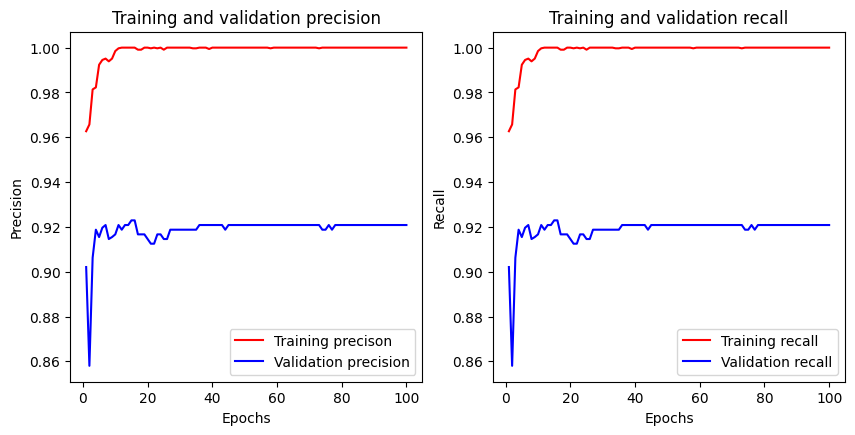

In [ ]:
import matplotlib.pyplot as plt
pre=history_dict['precision']
val_pre=history_dict['val_precision']
rec=history_dict['recall']
val_rec=history_dict['val_recall']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,pre,'r',label='Training precison')
ax1.plot(epochs,val_pre,'b',label='Validation precision')
ax1.set_title('Training and validation precision')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Precision')
ax1.legend()

ax2=plt.subplot(222)
ax2.plot(epochs,rec,'r',label='Training recall')
ax2.plot(epochs,val_rec,'b',label='Validation recall')
ax2.set_title('Training and validation recall')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Recall')
ax2.legend()

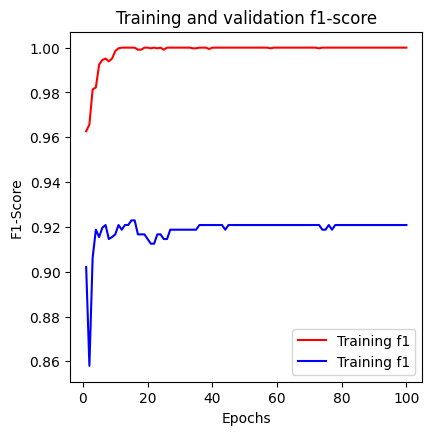

In [ ]:
import matplotlib.pyplot as plt
f1=history_dict['f1']
val_f1=history_dict['val_f1']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,f1,'r',label='Training f1')
ax1.plot(epochs,val_f1,'b',label='Training f1')
ax1.set_title('Training and validation f1-score')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('F1-Score')
ax1.legend()


In [ ]:
model.evaluate(test_ds)

12/12 [==============================] - 3s 212ms/step - loss: 1.0325 - accuracy: 0.8991 - precision: 0.8985 - recall: 0.8985 - f1: 0.8985


[1.0325243473052979,
 0.8991354703903198,
 0.8985294699668884,
 0.8985294699668884,
 0.8985293507575989]

In [ ]:
import numpy as np
import tensorflow as tf
from keras import backend as K


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras


def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())


def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

In [ ]:
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Create EfficientNetV2B2 base model without pre-trained weights
base_model = EfficientNetB1(weights=None, include_top=False, input_shape=(224, 224, 3))

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1000, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Declare learning rate and its changes
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.90,
    staircase=True)

# Compile the model (you can adjust the optimizer and loss function)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy', precision, recall, f1])

# Display the model summary
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_10 (Rescaling)    (None, 224, 224, 3)          0         ['input_10[0][0]']            
                                                                                                  
 normalization_9 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_10[0][0]']        
 tion)                                                                                            
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 225, 225, 3)          0         ['normalization_9[0][0]'

In [ ]:
# Start model training with Dropout using validation set
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
109/109 [==============================] - 93s 389ms/step - loss: 0.5920 - accuracy: 0.8154 - precision: 0.8155 - recall: 0.8155 - f1: 0.8155 - val_loss: 0.4834 - val_accuracy: 0.8252 - val_precision: 0.8280 - val_recall: 0.8280 - val_f1: 0.8280
Epoch 2/100
109/109 [==============================] - 39s 359ms/step - loss: 0.4562 - accuracy: 0.8206 - precision: 0.8207 - recall: 0.8207 - f1: 0.8207 - val_loss: 0.4749 - val_accuracy: 0.8252 - val_precision: 0.8280 - val_recall: 0.8280 - val_f1: 0.8280
Epoch 3/100
109/109 [==============================] - 39s 356ms/step - loss: 0.4500 - accuracy: 0.8225 - precision: 0.8225 - recall: 0.8225 - f1: 0.8225 - val_loss: 0.4671 - val_accuracy: 0.8252 - val_precision: 0.8280 - val_recall: 0.8280 - val_f1: 0.8280
Epoch 4/100
109/109 [==============================] - 39s 354ms/step - loss: 0.4268 - accuracy: 0.8292 - precision: 0.8293 - recall: 0.8293 - f1: 0.8293 - val_loss: 0.5119 - val_accuracy: 0.8252 - val_precision: 0.8280 - val_

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'f1', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_f1'])

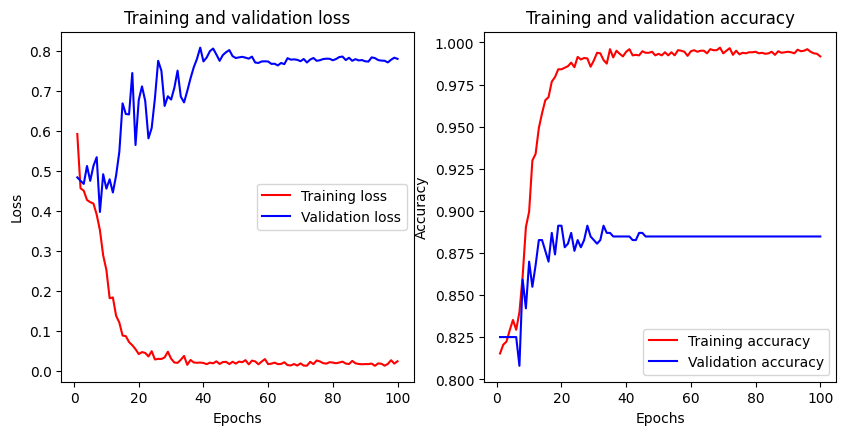

In [ ]:
import matplotlib.pyplot as plt
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,loss,'r',label='Training loss')
ax1.plot(epochs,val_loss,'b',label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2=plt.subplot(222)
ax2.plot(epochs,acc,'r',label='Training accuracy')
ax2.plot(epochs,val_acc,'b',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()


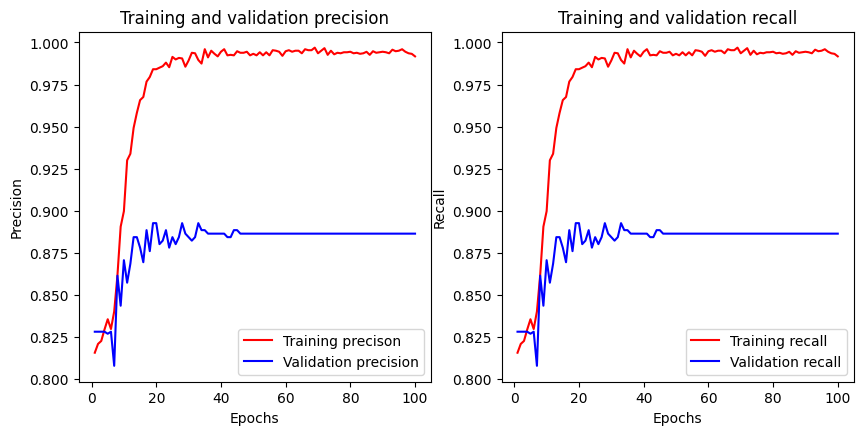

In [ ]:
import matplotlib.pyplot as plt
pre=history_dict['precision']
val_pre=history_dict['val_precision']
rec=history_dict['recall']
val_rec=history_dict['val_recall']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,pre,'r',label='Training precison')
ax1.plot(epochs,val_pre,'b',label='Validation precision')
ax1.set_title('Training and validation precision')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Precision')
ax1.legend()

ax2=plt.subplot(222)
ax2.plot(epochs,rec,'r',label='Training recall')
ax2.plot(epochs,val_rec,'b',label='Validation recall')
ax2.set_title('Training and validation recall')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Recall')
ax2.legend()

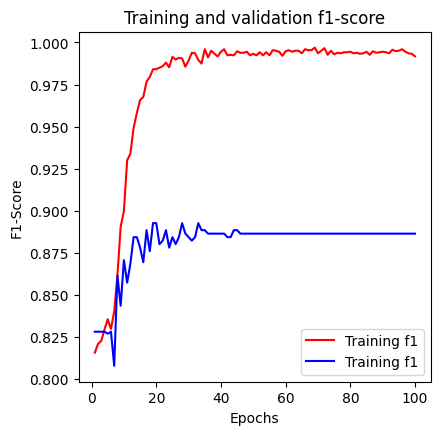

In [ ]:
import matplotlib.pyplot as plt
f1=history_dict['f1']
val_f1=history_dict['val_f1']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,f1,'r',label='Training f1')
ax1.plot(epochs,val_f1,'b',label='Training f1')
ax1.set_title('Training and validation f1-score')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('F1-Score')
ax1.legend()


In [ ]:
model.evaluate(test_ds)

12/12 [==============================] - 1s 76ms/step - loss: 1.1621 - accuracy: 0.8473 - precision: 0.8485 - recall: 0.8485 - f1: 0.8485


[1.1620882749557495,
 0.8472622632980347,
 0.8485293984413147,
 0.8485293984413147,
 0.8485293388366699]